In [2]:
import statsmodels.api as sm
from scipy.stats import norm
from scipy.stats import t
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import figure
import warnings
warnings.filterwarnings('ignore')

sns.set(font_scale= 1)


## Central Limit Theorem

- In probability theory, `the central limit theorem (CLT) establishes that, in many situations, when independent random variables are summed up, their properly normalized sum tends toward a normal distribution even if the original variables themselves are not normally distributed.`

- The theorem is a key concept in probability theory because it implies that probabilistic and statistical methods that work for normal distributions can be applicable to many problems involving other types of distributions.

if x1 , x2 , ... nx are random samples drawn from  population with 

overall mean μ and 

and finite variance σ² , and if x̅ is sample mean if first n samples, then the limiting from the distribution, 

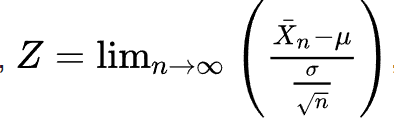
is a standard normal distribution .

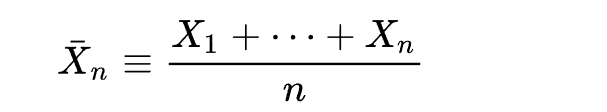

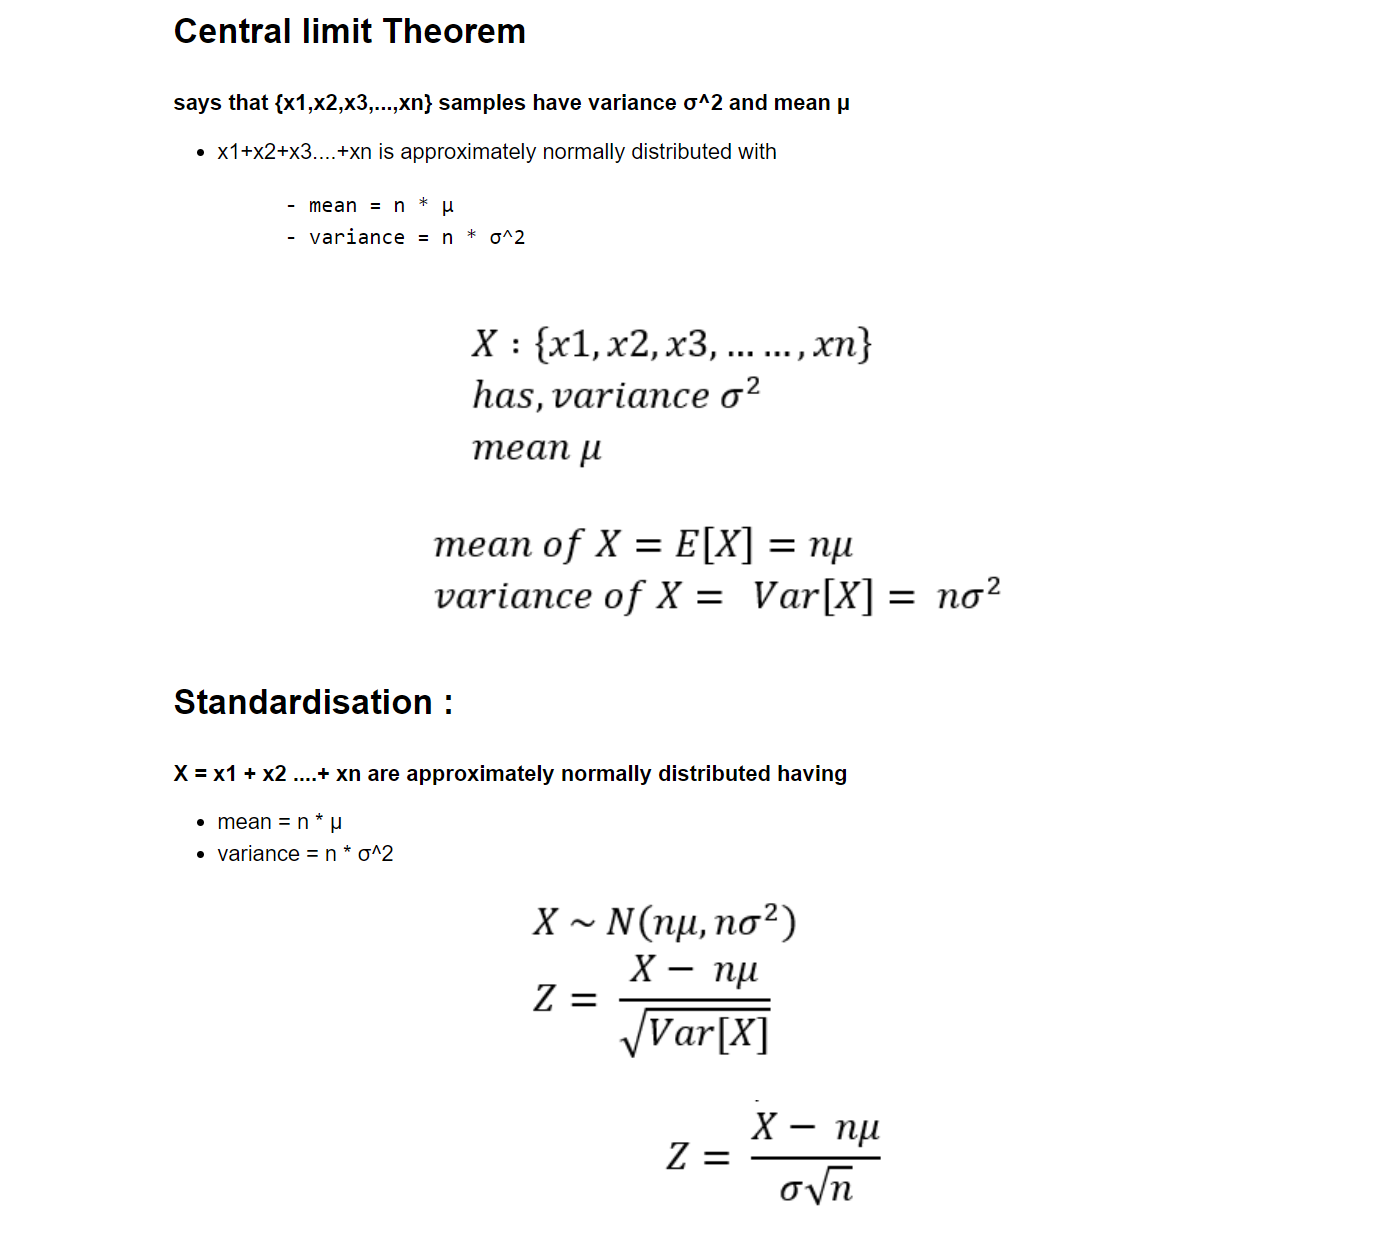

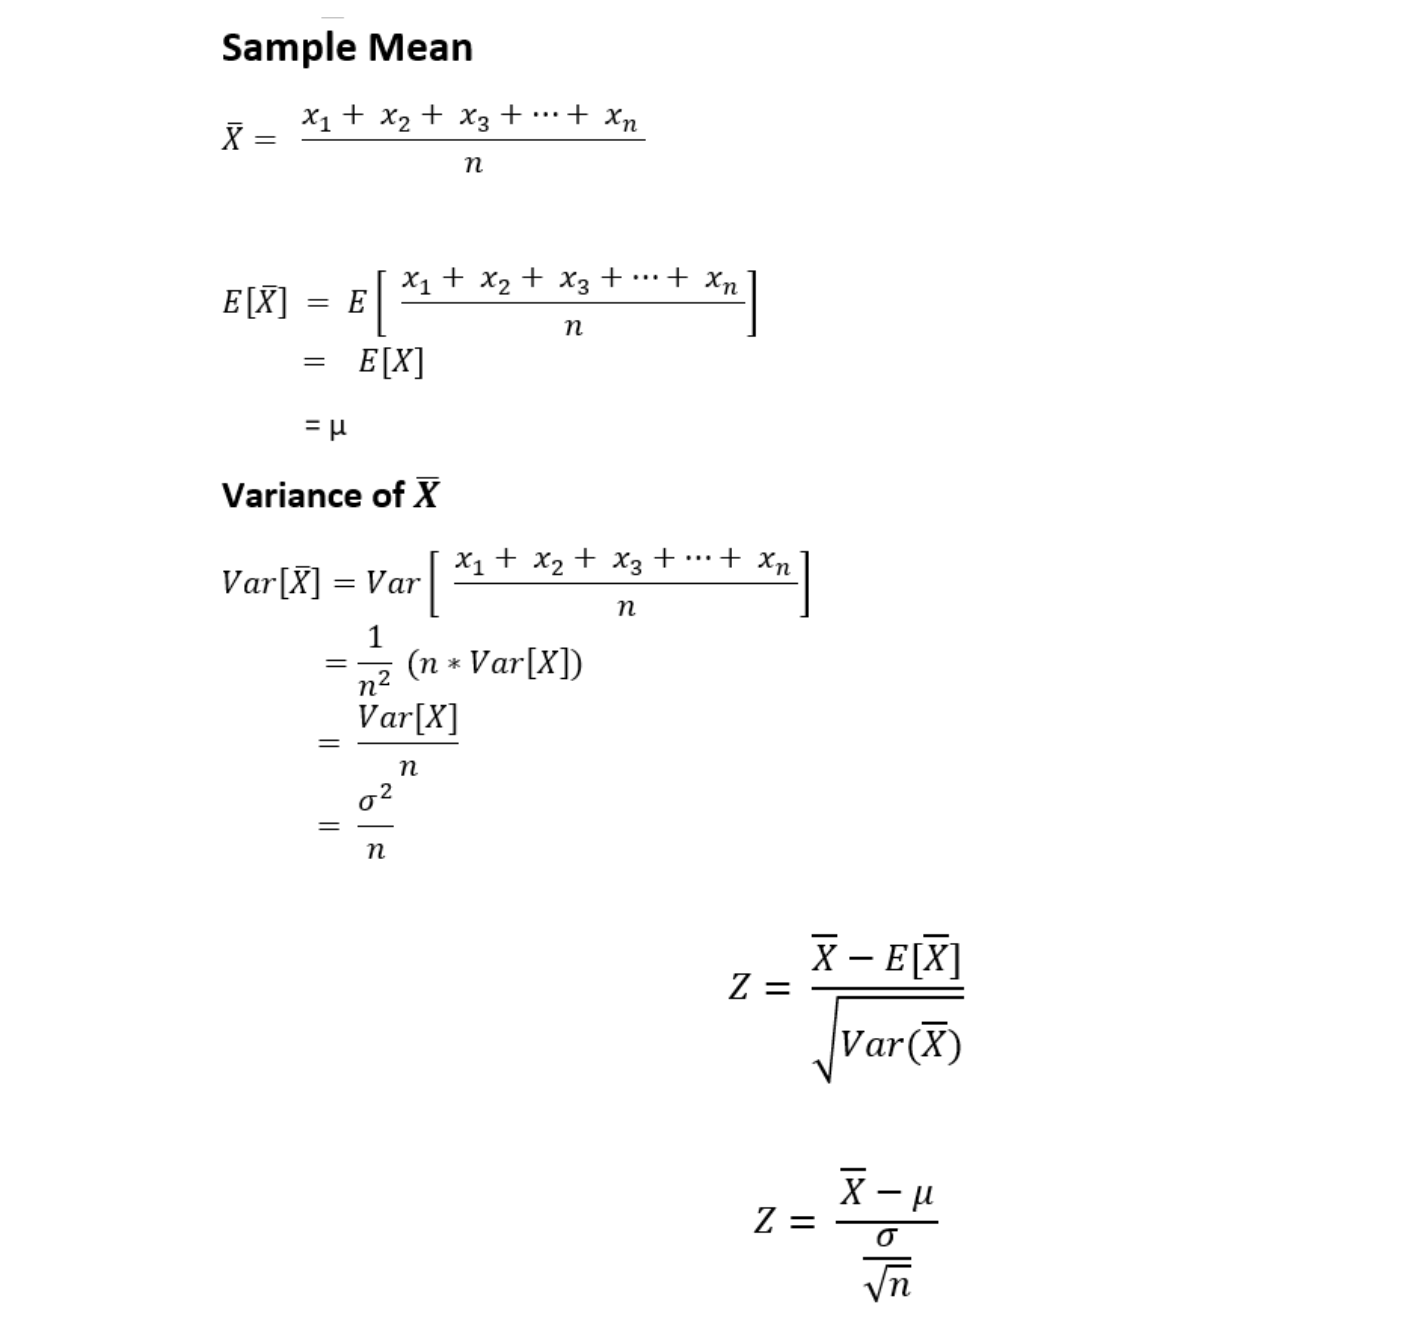

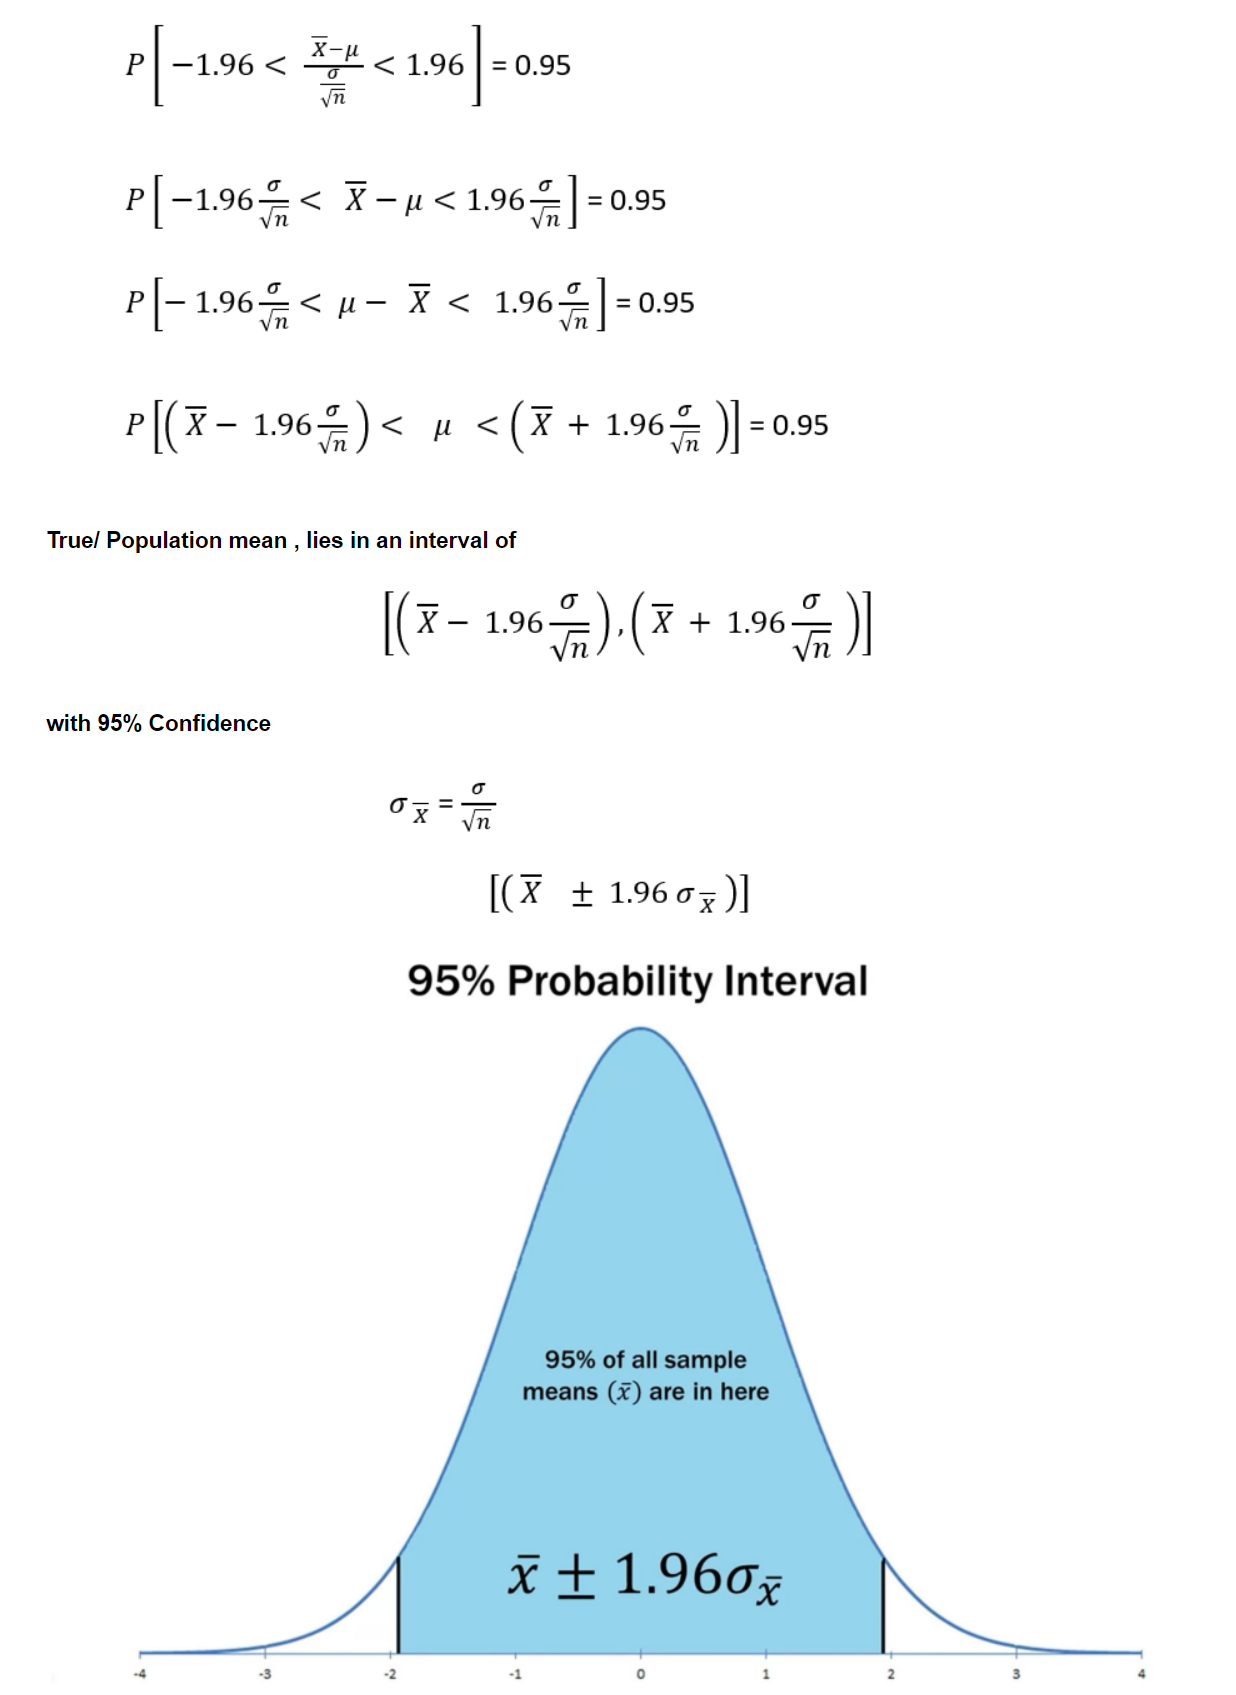

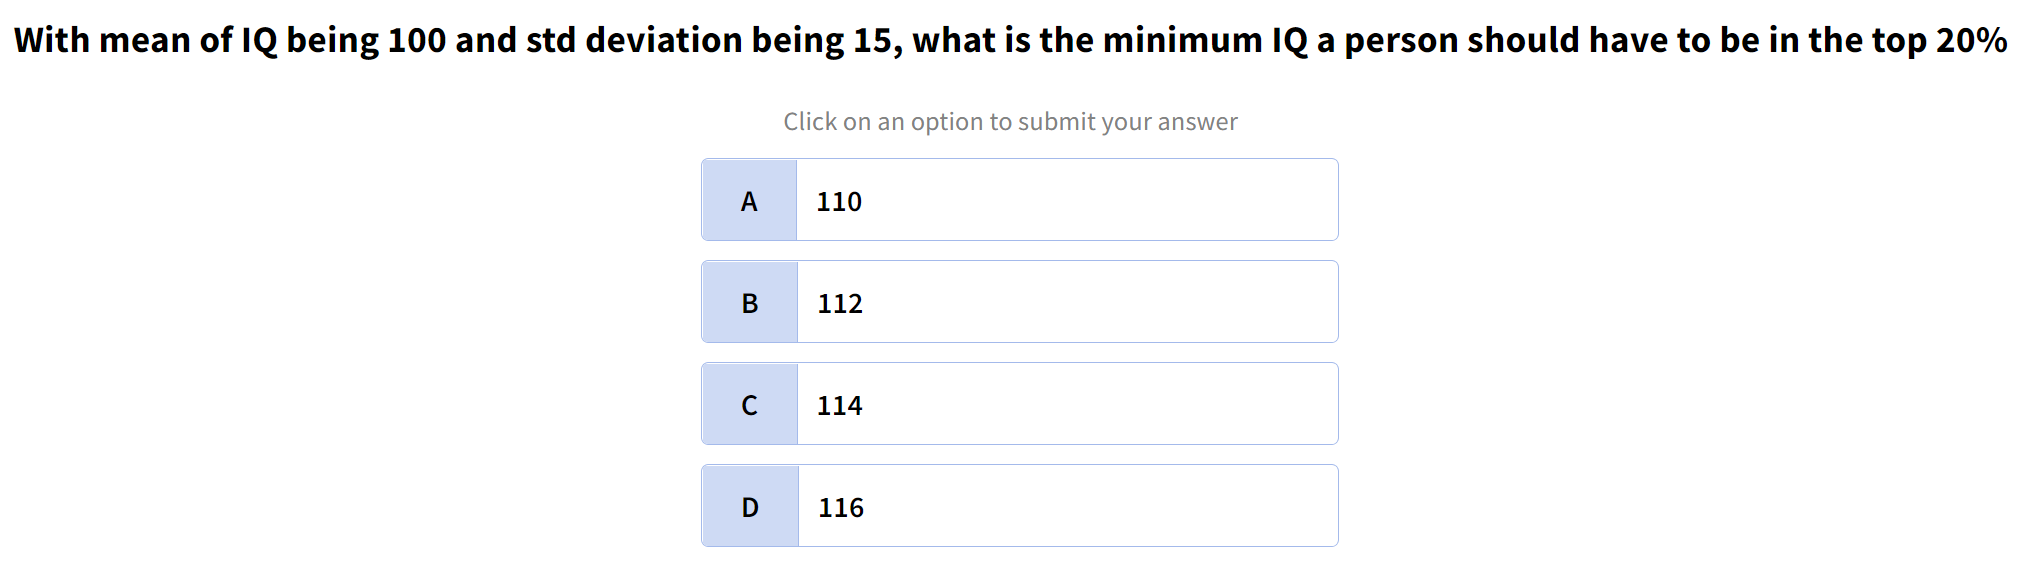

X ~ N(mean=100,std = 15)

    
        P[X > a] = 0.2
    P[Z <= a] = 0.8   #probability with  Min IQ a person should have to be in top 20 %


    mean = 100
    std = 15
    Min IQ a person should have to be in top 20 % 
    = (1-0.20)



Z = x-mean/sigma

In [4]:
norm.ppf(0.80)

0.8416212335729143

0.841621 = (x-100)/15

In [6]:
(0.8416*15)+100

112.624

# Bootstrap

# Bootstrapping (statistics)

- Bootstrapping is any test or metric that uses random sampling with replacement (e.g. mimicking the sampling process), and falls under the broader class of resampling methods. Bootstrapping assigns measures of accuracy (bias, variance, confidence intervals, prediction error, etc.) to sample estimates.
- This technique allows estimation of the sampling distribution of almost any statistic using random sampling methods.

- Bootstrapping estimates the properties of an estimator (such as its variance) by measuring those properties when sampling from an approximating distribution. One standard choice for an approximating distribution is the empirical distribution function of the observed data. In the case where a set of observations can be assumed to be from an independent and identically distributed population, this can be implemented by constructing a number of resamples with replacement, of the observed data set (and of equal size to the observed data set).

- It may also be used for constructing hypothesis tests. It is often used as an alternative to statistical inference based on the assumption of a parametric model when that assumption is in doubt, or where parametric inference is impossible or requires complicated formulas for the calculation of standard errors.

In [7]:
df = pd.read_csv("walmart_data-Copy1.txt")

In [8]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


<AxesSubplot:>

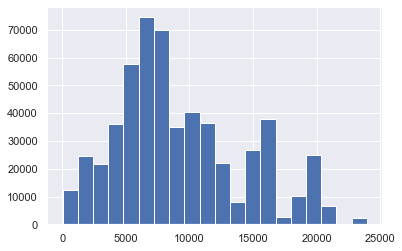

In [9]:
df["Purchase"].hist(bins = 20)

In [10]:
size = 1000
bootstrapped_mean= np.empty(size)

for i in range(size):
    btssample = df["Purchase"].sample(n=1000,replace=True)
    bootstrapped_mean[i] = np.mean(btssample)

<AxesSubplot:ylabel='Density'>

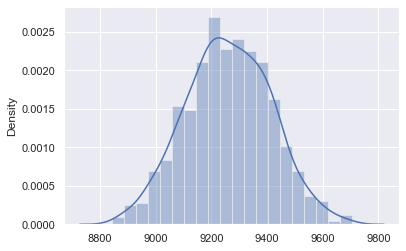

In [11]:
sns.distplot(bootstrapped_mean,bins = 20)

In [12]:
np.mean(bootstrapped_mean)

9260.963183

In [13]:
np.percentile(bootstrapped_mean,2.5),np.percentile(bootstrapped_mean,97.5)

(8966.67345, 9559.217775)

In [14]:
t.ppf((1-((1-(95)/100)/2)),df = 30-1)

2.045229642132703

In [15]:
def bootstrapping_CLT_CI(data,confidence=95, sample_size=1000,trials = 1000):

    '''
    data : array
    confidence level : Required Confidence Level
    Sample Size  : length of Sample Size
    Trials : How many times we take sample sample from data. 
    '''
    bootstrapped_mean= np.empty(trials)

    for i in range(trials):
        btssample = data.sample(n=sample_size,replace=True)
        bootstrapped_mean[i] = np.mean(btssample)
    
    
    sample_mean = np.mean(bootstrapped_mean)
    sample_std = np.std(data)
    standard_error = sample_std/np.sqrt(sample_size)
    talfa_by2 = t.ppf((1-((1-(confidence)/100)/2)),df = sample_size-1)
    print("t:",talfa_by2)
    margin_of_error = talfa_by2*standard_error
    print("sample mean :",sample_mean)
    print("sample standard deviation :",sample_std)
    print("sample size: ",sample_size)
    print("standard error :",standard_error)
    print("Margin of Error :",margin_of_error)
    
    
        
    lower_ = sample_mean - margin_of_error
    upper_ = sample_mean + margin_of_error
    CI = (lower_,upper_)
    print("Confidence Interval : ",CI)
    
    
    
    
    return np.percentile(bootstrapped_mean,(100-confidence)/2),np.percentile(bootstrapped_mean,(100-(100-confidence)/2))

In [16]:
bootstrapping_CLT_CI(df.loc[df["Gender"]=="M"]["Purchase"],95)

t: 1.9623414611334487
sample mean : 9433.975448000001
sample standard deviation : 5092.180063635943
sample size:  1000
standard error : 161.0288725679074
Margin of Error : 315.9936330795793
Confidence Interval :  (9117.981814920422, 9749.96908107958)


(9130.032325, 9771.57365)

In [17]:
bootstrapping_CLT_CI(df["Purchase"],95)

t: 1.9623414611334487
sample mean : 9265.356784
sample standard deviation : 5023.060827959972
sample size:  1000
standard error : 158.84313041924702
Margin of Error : 311.70446063791616
Confidence Interval :  (8953.652323362083, 9577.061244637916)


(8954.824050000001, 9569.985775000001)

In [18]:
bootstrapping_CLT_CI(df["Purchase"],95,sample_size=100000,trials=100)

t: 1.9599877077718446
sample mean : 9263.222513
sample standard deviation : 5023.060827959972
sample size:  100000
standard error : 15.8843130419247
Margin of Error : 31.133058308572412
Confidence Interval :  (9232.089454691428, 9294.355571308573)


(9233.9175985, 9288.82668425)

In [19]:
bootstrapping_CLT_CI(df.loc[df["Marital_Status"]==0]["Purchase"],95,sample_size=100000,trials=100)

t: 1.9599877077718446
sample mean : 9266.8647788
sample standard deviation : 5027.340117880186
sample size:  100000
standard error : 15.897845344840777
Margin of Error : 31.159581455945766
Confidence Interval :  (9235.705197344054, 9298.024360255946)


(9236.72448825, 9293.892778)

In [20]:
data = pd.read_csv("walmart_data-Copy1.txt")

In [21]:
data = data["Purchase"]

In [22]:
np.mean(data)

9263.968712959126

In [23]:
np.std(data)

5023.060827959972

In [24]:
data = pd.Series(data)

<AxesSubplot:>

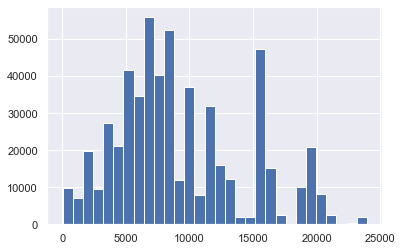

In [25]:
data.hist(bins = 30)

In [26]:
sample_size = 1000
btmeans = np.empty(sample_size)
btsize = 10000

for i in range(sample_size):
    btsamples = data.sample(n= btsize  ,replace=True)
    xbar = np.mean(btsamples)
    btmeans[i] = xbar

<AxesSubplot:ylabel='Density'>

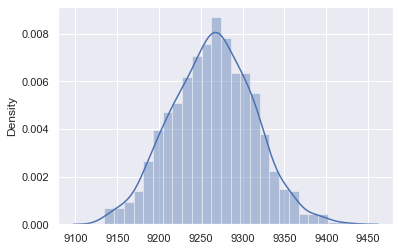

In [27]:
sns.distplot(btmeans,bins = 25)

In [28]:
btmeans.mean()

9264.0545488

In [29]:
btmeans.std()

48.93597443106038

In [30]:
np.percentile(btmeans,2.5),np.percentile(btmeans,97.5)

(9167.43441, 9357.38896)

In [31]:
t.ppf((1-((1-(95)/100)/2)),df = 55555-1)

1.960006687532413

# final function

In [32]:
def Bootstrapping_CLT_CI(data, confidence=95 , sample_size = 1000,r = 1000):
    
    
    '''
    data : array
    confidence level : Required Confidence Level
    Sample Size  : length of Sample Size
    Trials : How many times we take sample sample from data. 
    '''
    
    print("Data Distribution before Sampling/Bootstrap:")
    sns.distplot(data,bins = 15)
    plt.show()

    bootstrapped_mean= np.empty(r)

    for i in range(r):
        btssample = data.sample(n=sample_size,replace=False)
        bootstrapped_mean[i] = np.mean(btssample)
    print()
    print("Data Distribution After Sampling/Bootstraping:")
    sns.distplot(bootstrapped_mean,bins = 15)
    print()
    sample_mean = np.mean(bootstrapped_mean)
    std = np.std(data)
    standard_error = std/np.sqrt(sample_size)
    talfa_by2 = t.ppf((1-((1-(confidence)/100)/2)),df = sample_size-1)
    print("t:",talfa_by2)
    margin_of_error = talfa_by2*np.std(bootstrapped_mean)
    print("sample mean :",sample_mean)
    print("sample standard deviation :",std)
    print("sample size: ",sample_size)
    print("standard error :",standard_error)
    print("np.std(bootstrapped_mean):",np.std(bootstrapped_mean))
    print("Margin of Error :",margin_of_error)


    lower_ = sample_mean - margin_of_error
    upper_ = sample_mean + margin_of_error
    CI = (lower_,upper_)

    plt.axvline(x = lower_,c = "r")
    plt.axvline(x = upper_,c = "r")
    plt.show()



    print("Confidence Interval : ",CI)
    print()
    print((np.percentile(bootstrapped_mean,2.5)),(np.percentile(bootstrapped_mean,97.5)))


Data Distribution before Sampling/Bootstrap:


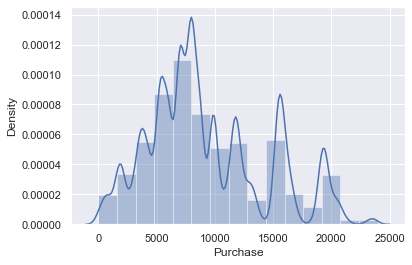


Data Distribution After Sampling/Bootstraping:

t: 1.9623414611334487
sample mean : 9258.036428
sample standard deviation : 5023.060827959972
sample size:  1000
standard error : 158.84313041924702
np.std(bootstrapped_mean): 163.24746451117954
Margin of Error : 320.34726803519885


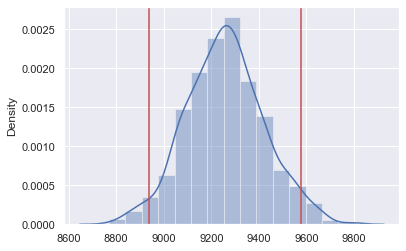

Confidence Interval :  (8937.6891599648, 9578.383696035198)

8928.1253 9593.121075


In [35]:
Bootstrapping_CLT_CI(data,sample_size=1000,r=1000)